In [49]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #pip install matplotlib if error

brdiff = pd.read_table('Historical marker crude prices_csv_new.csv',delimiter =';')
brdiff=brdiff.fillna(0)


brdiff.dtypes
brdiff =brdiff.iloc[:,1:11].astype(float)


train = brdiff.iloc[:-100]
test = brdiff.iloc[-100:]
#train = brdiff.iloc[:50]
#test = brdiff.iloc[-150:]

print(test)
print(train)





     Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  ESPO  \
136        114.6          2.9  -5.5 -13.2        -12.5      -13.3  -1.0   
137        114.0          2.3  -6.1 -17.7        -11.9      -13.4  -3.2   
138        116.9          1.9  -5.1 -19.6        -11.2      -14.2  -3.0   
139        110.4          3.0  -3.1 -24.0         -9.2      -14.5  -1.0   
140        113.1          3.5  -3.3 -27.6         -9.9      -15.8  -2.5   
..           ...          ...   ...   ...          ...        ...   ...   
231         71.3          1.4  -2.3  -7.4         -9.8       -6.5   1.7   
232         71.1          1.9  -4.3 -10.3        -10.1       -8.4   0.5   
233         64.1          1.7  -4.6  -9.4         -8.1       -5.2  -0.2   
234         64.0          1.4  -2.0  -6.5         -6.9       -4.1   2.3   
235         59.0          1.3  -1.9  -4.2        -12.6       -8.0   4.2   

     Urals NWE  Urals MED  Dubai  
136       -3.1       -3.6   -6.2  
137       -2.5       -2.4   -

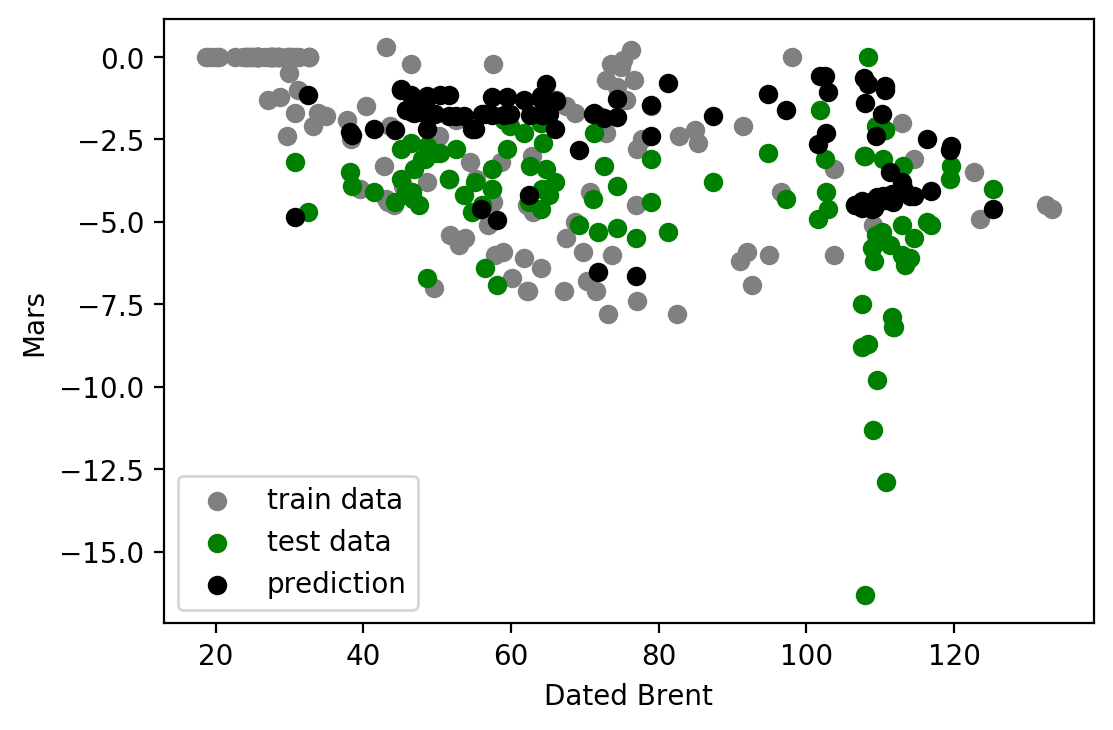

Mean squared error: 0.45


In [67]:
import matplotlib.pyplot as plt 

x_train=train[["Dated Brent","Maya USGC"]]
y_train=train["Mars"]


x_test=test[["Dated Brent","Maya USGC"]] 
y_test=test["Mars"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Mars")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))



In [91]:

data =  {'WTI':[-7.8],'Urals NWE':[-0.7]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[4.43912173]


Feature ranking:
Feature Dated Brent (0.070804)
Feature WTI (0.504040)
Feature Urals NWE (0.398653)
Feature Urals MED (0.026503)


Text(0, 0.5, 'Importance')

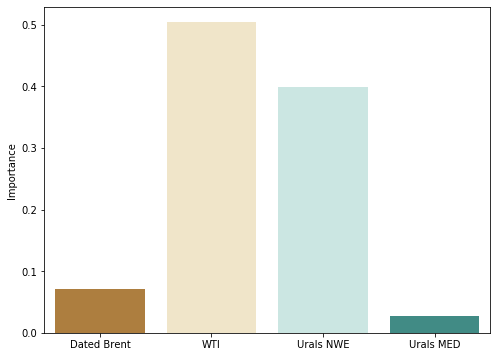

In [3]:
import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")



In [6]:
pred_mars = 2.18283821120787*(data_df["Urals NWE"]) + 0.078421148614628*data_df["WTI"]*(data_df["Urals NWE"]) + 0.21238045035529*np.power(data_df["Urals NWE"],2) + 0.00694375169716269*np.power(data_df["WTI"],2) - 0.411234772733086 - 0.645228318224678*data_df["WTI"]
print(pred_mars)

NameError: name 'data_df' is not defined

In [51]:
k1= brdiff["Dated Brent"]
k2= brdiff["WTI"]
k3= brdiff["Maya Europe"]
k4= brdiff["Maya USGC"]
linear_mars = 0.0297+ -0.0012*k1 + 0.0445*k2 + 0.0345*k3 + 0.3363*k4

In [52]:
pred_mars = 0.400045788638837*(brdiff["Maya USGC"]) + 0.310154060960814*np.power(brdiff["Maya USGC"],2)/(brdiff["Dated Brent"]) - 0.440193883512435

Text(0, 0.5, 'Mars')

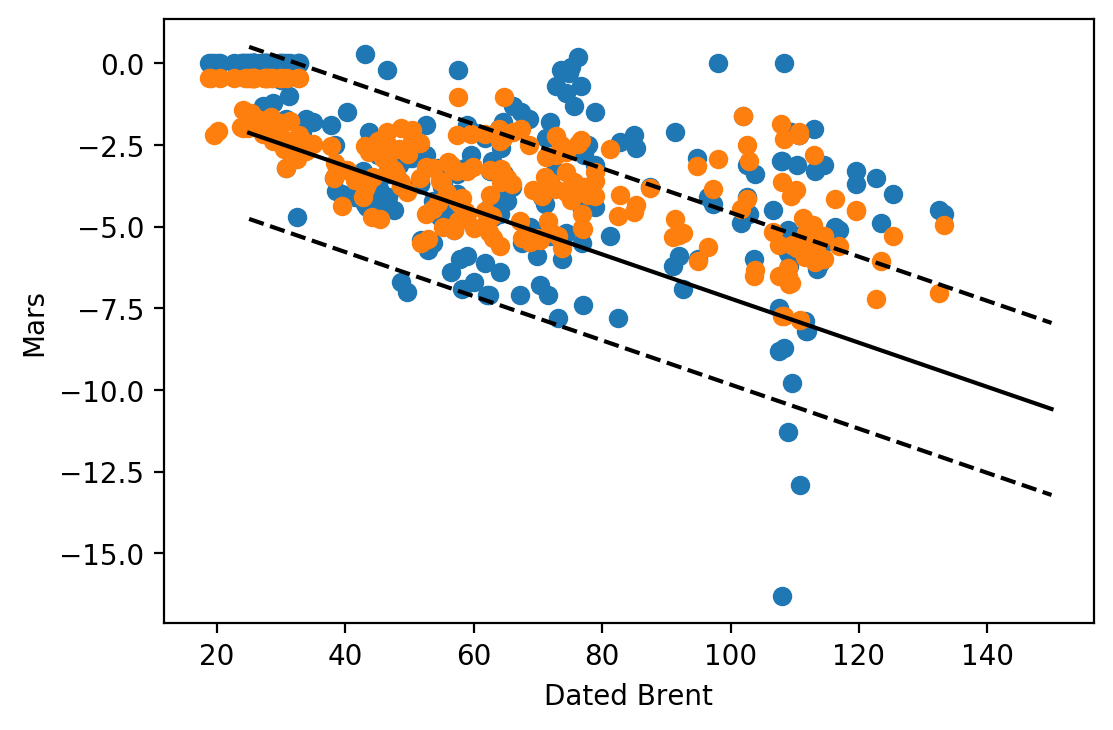

In [55]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(brdiff["Dated Brent"],brdiff["Mars"])
plt.scatter(brdiff["Dated Brent"],pred_mars)


DB = pd.DataFrame([0,25,50,75,100,125,150])
MU = pd.DataFrame([0,-5,-10,-15,-20,-25,-30])


P_mars = 0.400045788638837*(MU) + 0.310154060960814*np.power(MU,2)/(DB) - 0.440193883512435

plt.plot(DB,P_mars,'k')
plt.plot(DB,P_mars+np.std(brdiff["Mars"]),'--k')
plt.plot(DB,P_mars-np.std(brdiff["Mars"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Mars')

In [64]:
K = 0.400045788638837*(-5.7) + 0.310154060960814*np.power(-5.7,2)/(65) - 0.440193883512435
print(K)

-2.5654255642827772


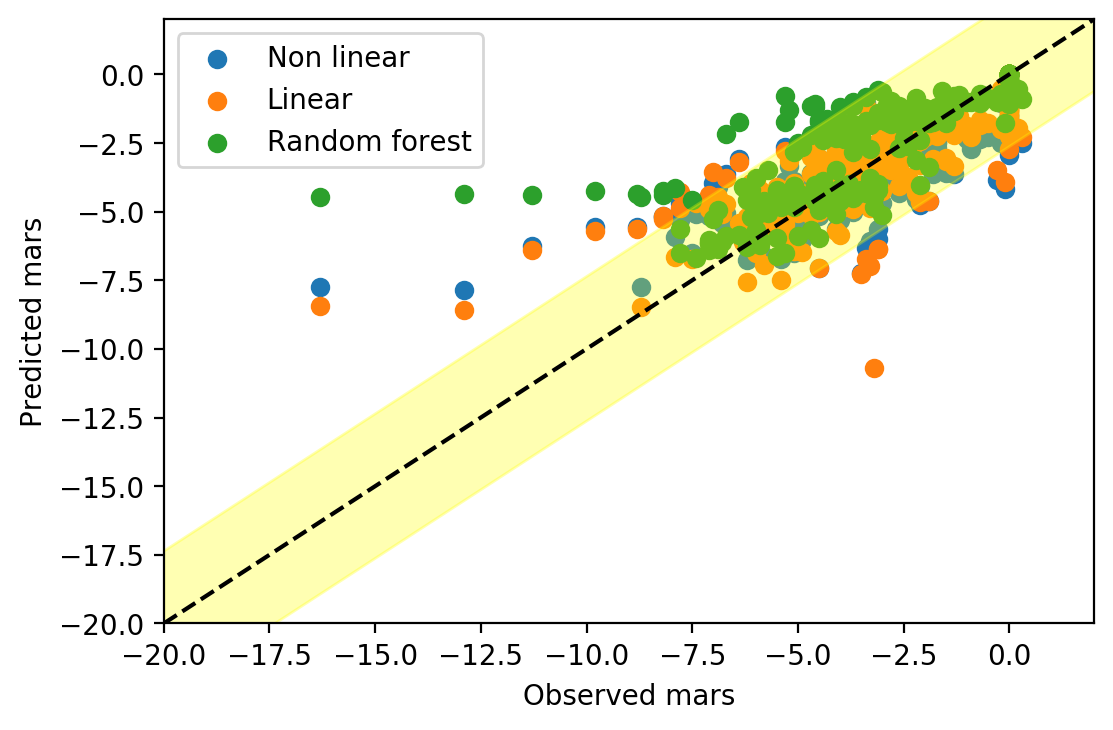

In [79]:
plt.rcParams['figure.dpi'] = 200

plt_nl=plt.scatter(brdiff["Mars"],pred_mars)
plt_l =plt.scatter(brdiff["Mars"],linear_mars)


x_all=brdiff[["Dated Brent","Maya USGC"]] 
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)


x_test2=test["Mars"].to_frame()

plt_rf=plt.scatter(brdiff["Mars"],y_all)
xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(brdiff["Mars"]), pop_mean-np.std(brdiff["Mars"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed mars')
plt.ylabel('Predicted mars')
plt.xlim([-20, 2])
plt.ylim([-20, 2])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [77]:
np.size(y_all)

100

In [17]:
5.51925357777404*np.exp(-101.161902062367/(64.8))

1.158472313237753

Text(0, 0.5, 'Bonny light')

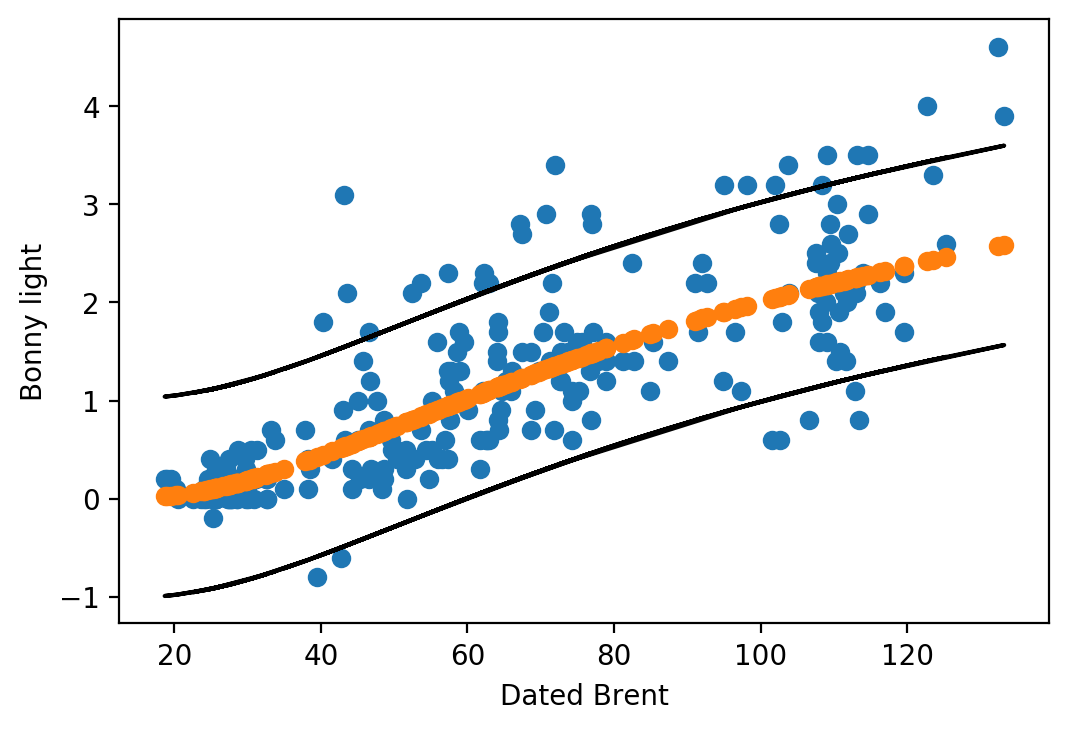

In [15]:
pred_BL = 5.51925357777404*np.exp(-101.161902062367/(brdiff["Dated Brent"]))

plt.rcParams['figure.dpi'] = 200
plt.scatter(brdiff["Dated Brent"],brdiff["Bonny light"])
plt.scatter(brdiff["Dated Brent"],pred_BL)
plt.plot(brdiff["Dated Brent"],pred_BL+np.std(brdiff["Bonny light"]),'k')
plt.plot(brdiff["Dated Brent"],pred_BL-np.std(brdiff["Bonny light"]),'k')
plt.xlabel('Dated Brent')
plt.ylabel('Bonny light')

In [6]:
linear_BL = -0.5208+ 0.0264*k1 


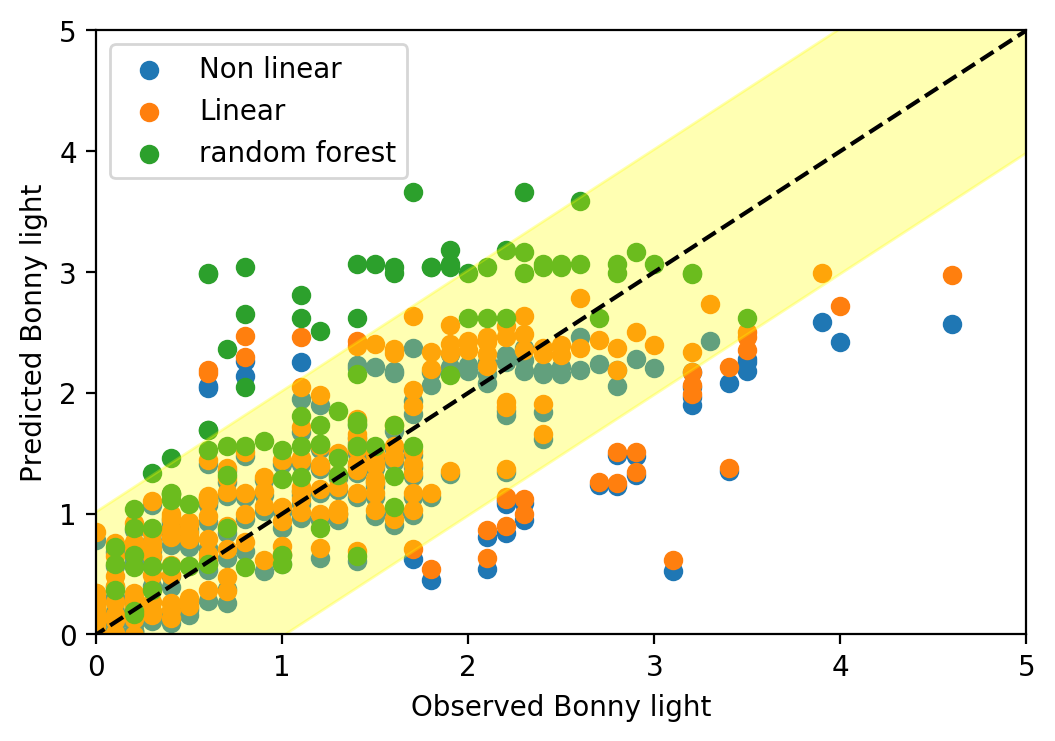

In [37]:
plt_nl=plt.scatter(brdiff["Bonny light"],pred_BL)
plt_l =plt.scatter(brdiff["Bonny light"],linear_BL)
x_test2=test["Bonny light"].to_frame()
plt_rf=plt.scatter(x_test2,y_pred)

xvalue = np.linspace(-1,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(brdiff["Bonny light"]), pop_mean-np.std(brdiff["Bonny light"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Bonny light')
plt.ylabel('Predicted Bonny light')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","random forest"))
plt.show()

In [3]:
brdiff_time = pd.read_table('Historical marker crude prices_csv.csv',delimiter =';')
brdiff_time = brdiff_time.stack().str.replace(',','.').unstack()
brdiff_time=brdiff_time.fillna(0)
print(brdiff_time)

           Date Dated Brent Bonny light Mars    WTI Maya Europe Maya USGC  \
0    01.01.2000        25.5           0    0      0           0         0   
1    01.02.2000        27.9           0    0      0           0         0   
2    01.03.2000        27.3           0    0      0           0         0   
3    01.04.2000        22.6           0    0      0           0         0   
4    01.05.2000        27.6           0    0      0           0         0   
..          ...         ...         ...  ...    ...         ...       ...   
231  01.04.2019        71.3         1.4  5.1   -7.4        -9.8      -6.5   
232  01.05.2019        71.1         1.9  5.9  -10.3       -10.1      -8.4   
233  01.06.2019        64.1         1.7  4.8   -9.4        -8.1      -5.2   
234  01.07.2019        64.0         1.4  4.5   -6.5        -6.9      -4.1   
235  01.08.2019        59.0         1.3  2.3   -4.2       -12.6      -8.0   

     ESPO Urals NWE Urals MED Dubai  
0       0      -0.5      -0.5  -2.2  

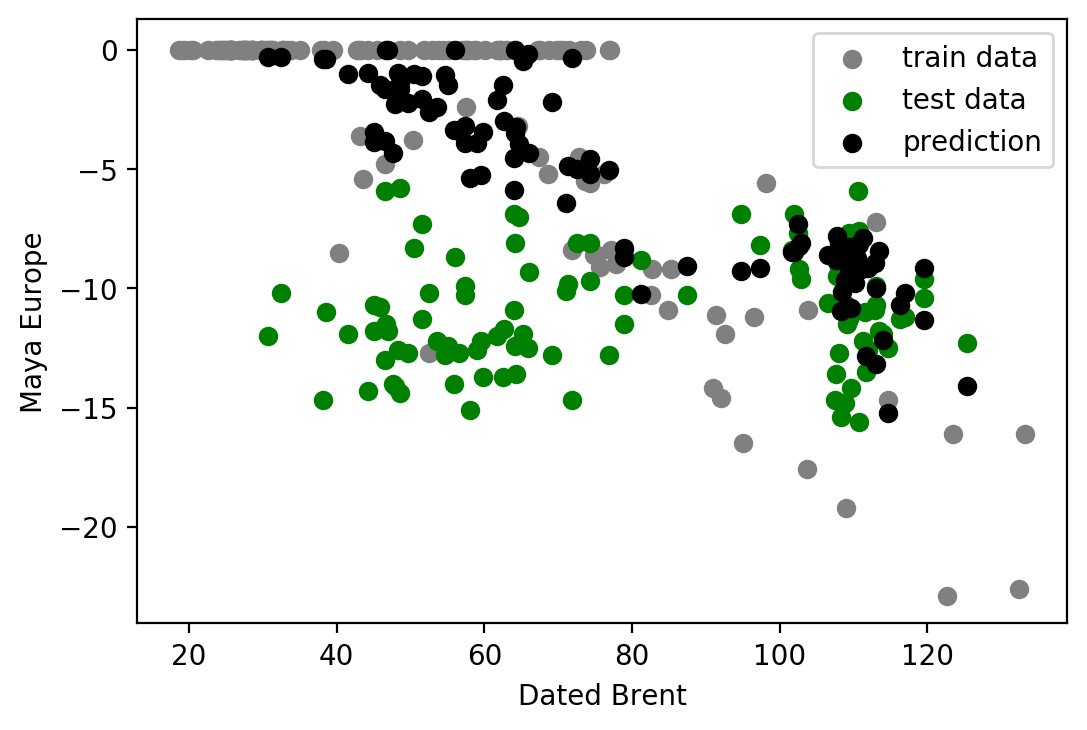

Mean squared error: 0.59
Feature ranking:
Feature Dated Brent (0.752863)
Feature Bonny light (0.069812)
Feature Urals NWE (0.069249)
Feature Urals MED (0.108077)


Text(0, 0.5, 'Importance')

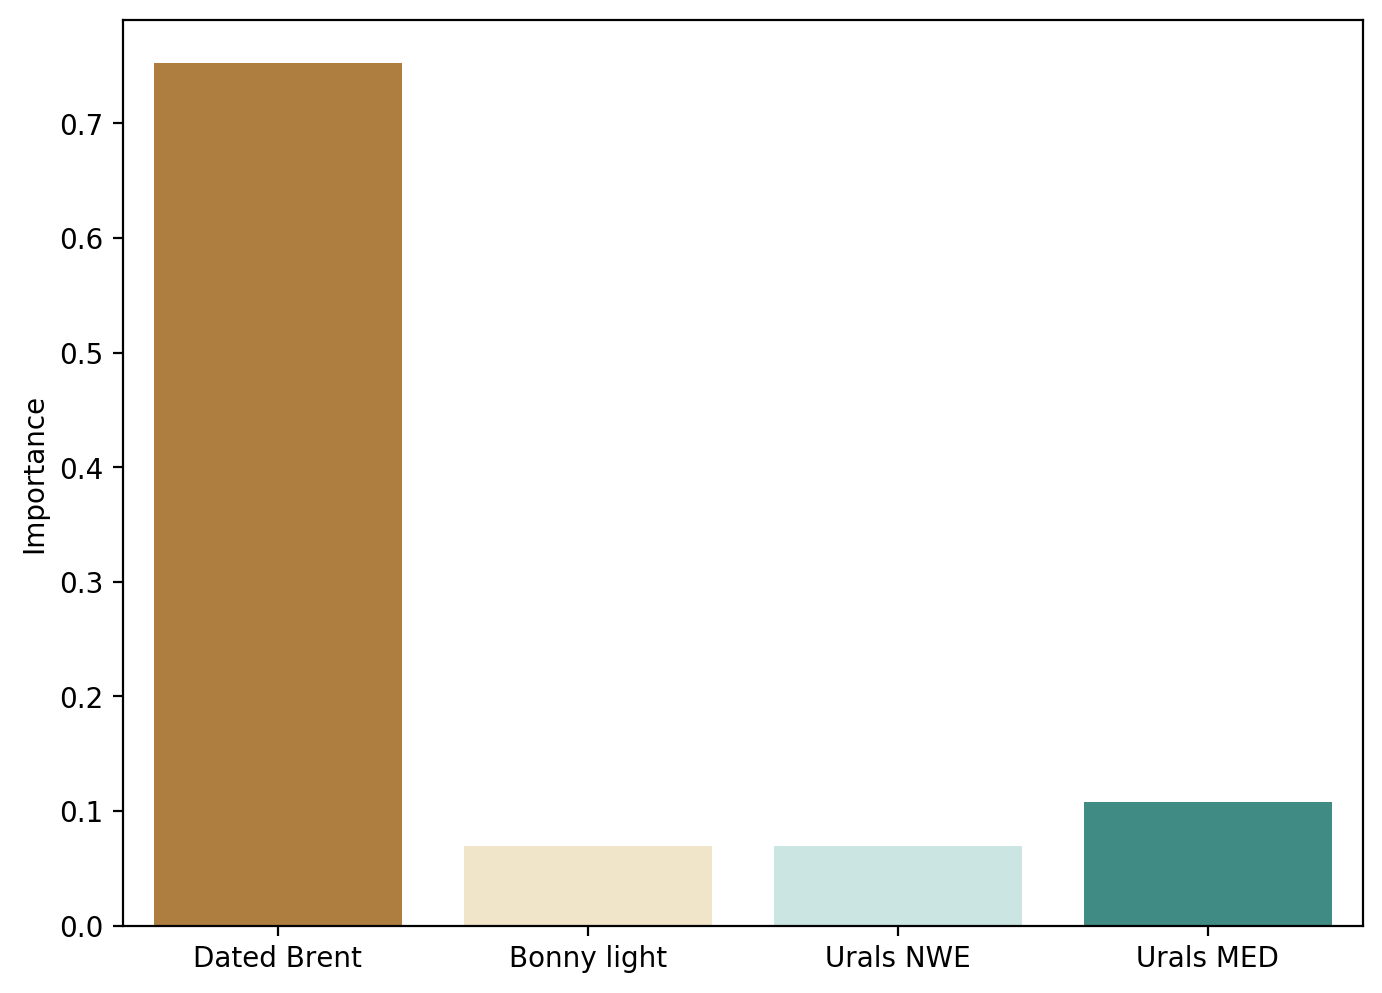

In [18]:
plt.rcParams['figure.dpi'] = 200
train = brdiff.iloc[:-100]
test = brdiff.iloc[-100:]
x_train=train[["Dated Brent","Bonny light","Urals NWE","Urals MED"]]
y_train=train["Maya Europe"]


x_test=test[["Dated Brent","Bonny light","Urals NWE","Urals MED"]] 
y_test=test["Maya Europe"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Maya Europe")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")



In [19]:
#How to input data into trained model 

data =  {'Dated Brent':[64.88],'Bonny light':[1.51],'Urals NWE':[-0.7],'Urals MED':[-0.1]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 4 

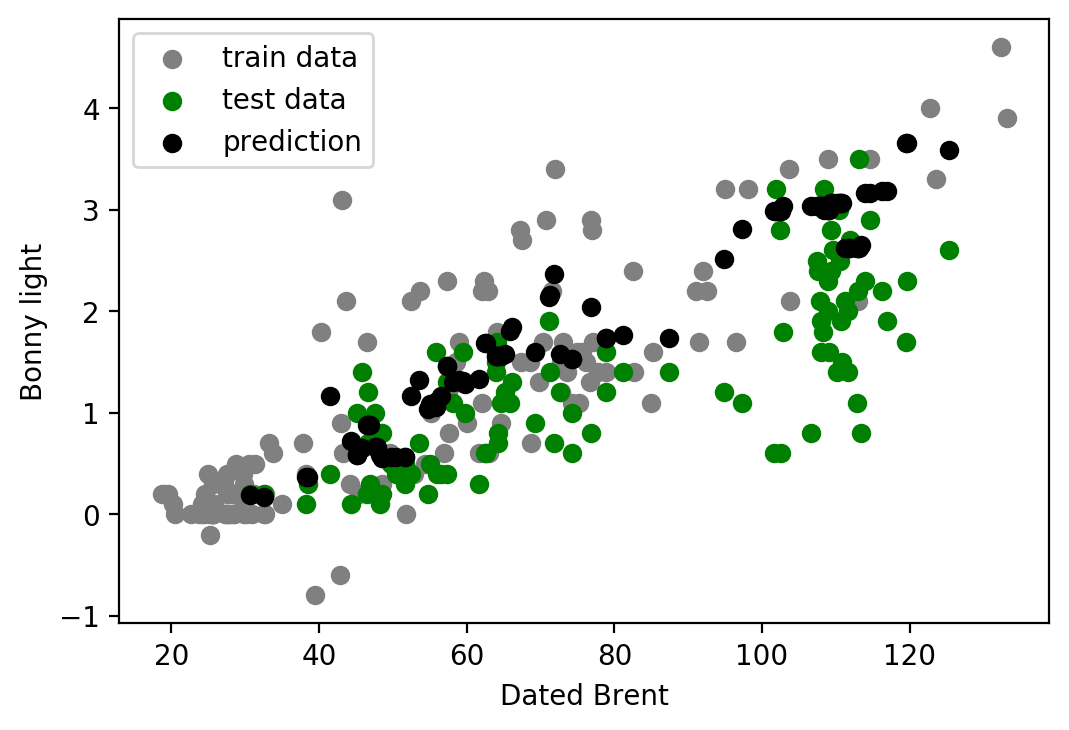

Mean squared error: 0.18
Feature ranking:
Feature Dated Brent (1.000000)


Text(0, 0.5, 'Importance')

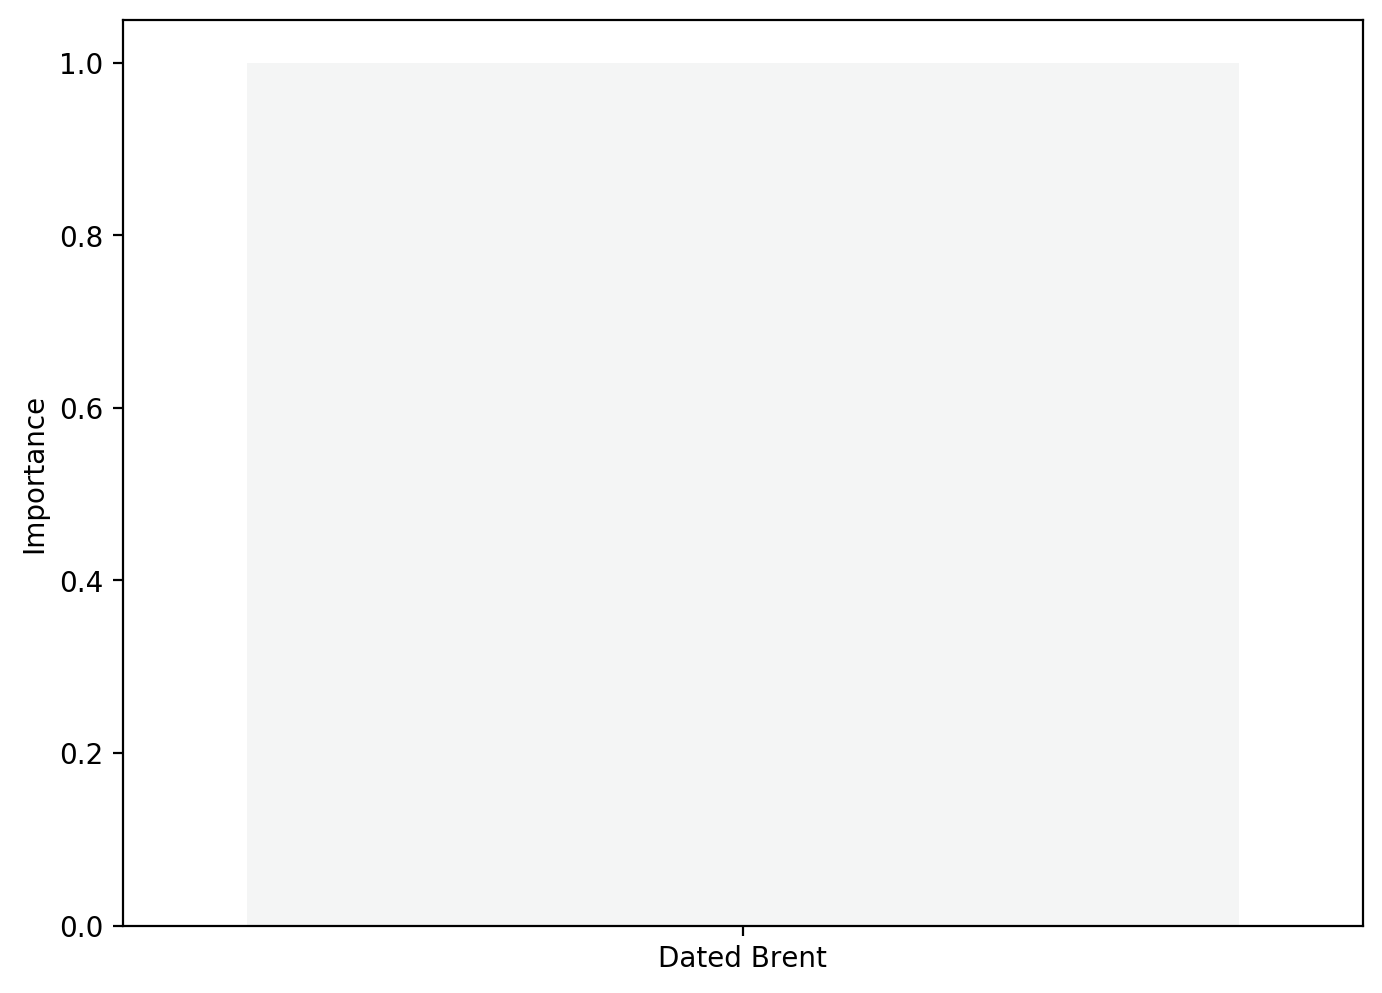

In [35]:
plt.rcParams['figure.dpi'] = 200
train = brdiff.iloc[:-100]
test = brdiff.iloc[-100:]
x_train=train[["Dated Brent"]]
y_train=train["Bonny light"]


x_test=test[["Dated Brent"]] 
y_test=test["Bonny light"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Bonny light")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

In [32]:
data =  {'Dated Brent':[64.88]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[1.56603122]


In [ ]:
pred_MayaE = 0.113210645149441*brdiff["Dated Brent"] - 15.7114332500011 - brdiff["Urals MED"] - 5.24389523313169*np.exp(-6)*np.power(brdiff["Dated Brent"],3) - 0.651821591027008*np.power(brdiff["Urals MED"],2)

plt.rcParams['figure.dpi'] = 200
plt.scatter(brdiff["Dated Brent"],brdiff["Bonny light"])
plt.scatter(brdiff["Dated Brent"],pred_BL)
plt.plot(brdiff["Dated Brent"],pred_BL+np.std(brdiff["Bonny light"]),'k')
plt.plot(brdiff["Dated Brent"],pred_BL-np.std(brdiff["Bonny light"]),'k')
plt.xlabel('Dated Brent')
plt.ylabel('Bonny light')
plt.show()